In [55]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression


Converting txt files to csv

In [56]:
read_file = pd.read_csv (r'datatraining.txt')
read_file.to_csv (r'datatraining.csv', index=None)

In [57]:
read_file = pd.read_csv (r'datatest.txt')
read_file.to_csv (r'datatest.csv', index=None)

In [58]:
read_file = pd.read_csv (r'datatest2.txt')
read_file.to_csv (r'datatest2.csv', index=None)

In [59]:
df=pd.read_csv('datatest.csv')
df1=pd.read_csv('datatraining.csv')
df2=pd.read_csv('datatest2.csv')

Combining those csv files into one dataframe

In [60]:
df3=pd.concat([df,df1,df2], ignore_index=True)

Converted Occupancy from binary 1 and 0 to Yes and No in df4 but kept df3 because the binary may be easier for analysis

In [61]:
df4=df3.copy()

In [62]:
df4['Occupancy'] = df4['Occupancy'].map(lambda x: 'yes' if x == 1 else 'no')
df4['Occupancy'] = df4['Occupancy'].astype(str)

In [63]:
df3

date  Temperature  Humidity       Light          CO2  \
0      2015-02-02 14:19:00      23.7000   26.2720  585.200000   749.200000   
1      2015-02-02 14:19:59      23.7180   26.2900  578.400000   760.400000   
2      2015-02-02 14:21:00      23.7300   26.2300  572.666667   769.666667   
3      2015-02-02 14:22:00      23.7225   26.1250  493.750000   774.750000   
4      2015-02-02 14:23:00      23.7540   26.2000  488.600000   779.000000   
...                    ...          ...       ...         ...          ...   
20555  2015-02-18 09:15:00      20.8150   27.7175  429.750000  1505.250000   
20556  2015-02-18 09:16:00      20.8650   27.7450  423.500000  1514.500000   
20557  2015-02-18 09:16:59      20.8900   27.7450  423.500000  1521.500000   
20558  2015-02-18 09:17:59      20.8900   28.0225  418.750000  1632.000000   
20559  2015-02-18 09:19:00      21.0000   28.1000  409.000000  1864.000000   

       HumidityRatio  Occupancy  
0           0.004764          1  
1           0.004773          1  
2           0.004765          1  
3           0.004744          1  
4           0.004767          1  
...              ...        ...  
20555       0.004213          1  
20556       0.004230          1  
20557       0.004237          1  
20558       0.004279          1  
20559       0.004321          1  

[20560 rows x 7 columns]

In [64]:
df4

date  Temperature  Humidity       Light          CO2  \
0      2015-02-02 14:19:00      23.7000   26.2720  585.200000   749.200000   
1      2015-02-02 14:19:59      23.7180   26.2900  578.400000   760.400000   
2      2015-02-02 14:21:00      23.7300   26.2300  572.666667   769.666667   
3      2015-02-02 14:22:00      23.7225   26.1250  493.750000   774.750000   
4      2015-02-02 14:23:00      23.7540   26.2000  488.600000   779.000000   
...                    ...          ...       ...         ...          ...   
20555  2015-02-18 09:15:00      20.8150   27.7175  429.750000  1505.250000   
20556  2015-02-18 09:16:00      20.8650   27.7450  423.500000  1514.500000   
20557  2015-02-18 09:16:59      20.8900   27.7450  423.500000  1521.500000   
20558  2015-02-18 09:17:59      20.8900   28.0225  418.750000  1632.000000   
20559  2015-02-18 09:19:00      21.0000   28.1000  409.000000  1864.000000   

       HumidityRatio Occupancy  
0           0.004764       yes  
1           0.004773       yes  
2           0.004765       yes  
3           0.004744       yes  
4           0.004767       yes  
...              ...       ...  
20555       0.004213       yes  
20556       0.004230       yes  
20557       0.004237       yes  
20558       0.004279       yes  
20559       0.004321       yes  

[20560 rows x 7 columns]

In [65]:
df3.sample(10)

date  Temperature   Humidity   Light          CO2  \
6472   2015-02-07 09:17:59    20.066667  19.260000  133.00   460.666667   
14789  2015-02-14 09:08:59    20.000000  36.317500   13.50   508.250000   
9975   2015-02-09 19:40:59    20.700000  35.500000    0.00  1081.000000   
7286   2015-02-07 22:52:00    19.700000  28.566667    0.00   439.666667   
8226   2015-02-08 14:31:59    20.500000  26.245000   86.25   420.000000   
14206  2015-02-13 23:25:59    20.100000  32.950000    0.00   507.500000   
5202   2015-02-06 12:08:00    21.700000  20.390000  494.00   791.000000   
17431  2015-02-16 05:10:59    20.390000  25.600000    0.00   781.000000   
3381   2015-02-05 05:47:00    20.890000  23.445000    0.00   451.000000   
18118  2015-02-16 16:38:00    21.700000  29.790000  429.00   930.000000   

       HumidityRatio  Occupancy  
6472        0.002789          0  
14789       0.005258          0  
9975        0.005368          0  
7286        0.004052          0  
8226        0.003911          0  
14206       0.004797          0  
5202        0.003267          1  
17431       0.003788          0  
3381        0.003576          0  
18118       0.004785          1

In [66]:
df4.sample(10)

date  Temperature   Humidity       Light          CO2  \
18938  2015-02-17 06:17:59        20.39  30.390000    0.000000   743.666667   
6944   2015-02-07 17:10:00        20.60  20.790000    0.000000   431.666667   
2251   2015-02-04 03:49:59        20.70  24.628571    0.000000   476.857143   
12206  2015-02-12 14:06:00        23.89  24.267500  149.750000   649.000000   
16310  2015-02-15 10:30:00        22.10  28.790000  176.666667   638.000000   
18180  2015-02-16 17:39:59        22.00  30.200000  419.000000   986.250000   
16588  2015-02-15 15:08:00        21.70  30.945000   77.500000   660.250000   
20148  2015-02-18 02:28:00        20.60  26.840000    0.000000  1233.500000   
6433   2015-02-07 08:38:59        19.70  19.500000   26.500000   460.250000   
9959   2015-02-09 19:25:00        20.79  35.790000    0.000000  1158.000000   

       HumidityRatio Occupancy  
18938       0.004502        no  
6944        0.003113        no  
2251        0.003714        no  
12206       0.004449        no  
16310       0.004738        no  
18180       0.004942       yes  
16588       0.004972        no  
20148       0.004025        no  
6433        0.002760        no  
9959        0.005442        no

In [67]:
df3.describe()

Temperature      Humidity         Light           CO2  HumidityRatio  \
count  20560.000000  20560.000000  20560.000000  20560.000000   20560.000000   
mean      20.906212     27.655925    130.756622    690.553276       0.004228   
std        1.055315      4.982154    210.430875    311.201281       0.000768   
min       19.000000     16.745000      0.000000    412.750000       0.002674   
25%       20.200000     24.500000      0.000000    460.000000       0.003719   
50%       20.700000     27.290000      0.000000    565.416667       0.004292   
75%       21.525000     31.290000    301.000000    804.666667       0.004832   
max       24.408333     39.500000   1697.250000   2076.500000       0.006476   

          Occupancy  
count  20560.000000  
mean       0.231031  
std        0.421503  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

Checking for missing data

In [68]:
df3.count()

date             20560
Temperature      20560
Humidity         20560
Light            20560
CO2              20560
HumidityRatio    20560
Occupancy        20560
dtype: int64

In [69]:
df4.count()

date             20560
Temperature      20560
Humidity         20560
Light            20560
CO2              20560
HumidityRatio    20560
Occupancy        20560
dtype: int64

In [70]:
len(df3)

20560

Examining Relationships between variables

<AxesSubplot:>

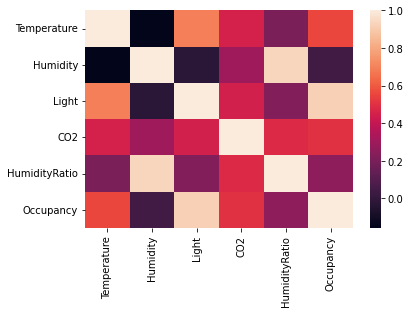

In [71]:
sns.heatmap(df3.corr())

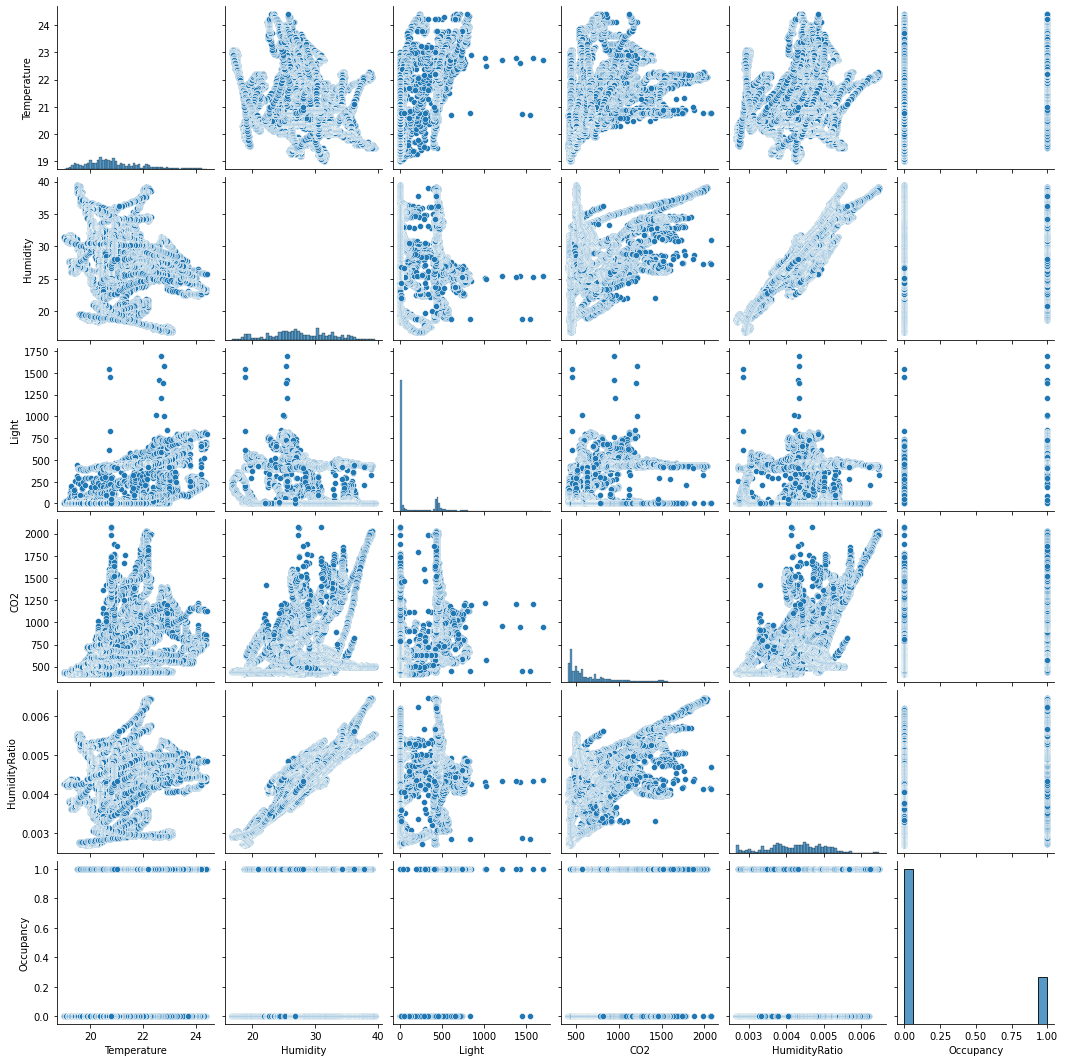

In [72]:
sns.pairplot(df3[['Temperature', 'Humidity', 'Light', 'CO2','HumidityRatio','Occupancy']])

[Text(0.5, 1.0, 'CO2')]

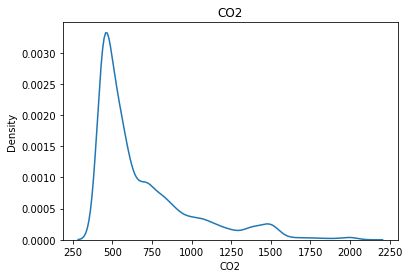

In [73]:
sns.kdeplot(df3['CO2']).set(title='CO2')

[Text(0.5, 1.0, 'Occupancy')]

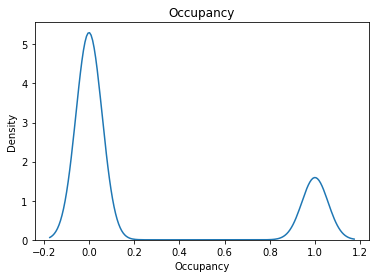

In [74]:
sns.kdeplot(df3['Occupancy']).set(title='Occupancy')

[Text(0.5, 1.0, 'Temperature')]

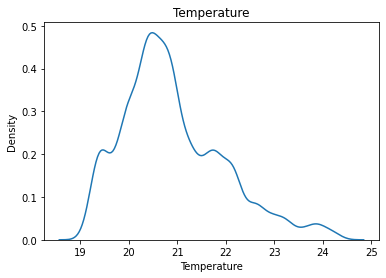

In [75]:
sns.kdeplot(df3['Temperature']).set(title='Temperature')

[Text(0.5, 1.0, 'Humidity')]

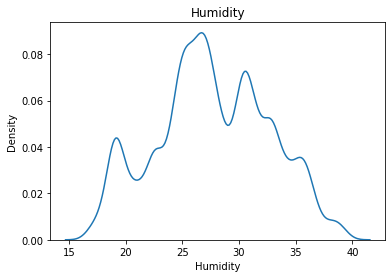

In [76]:
sns.kdeplot(df3['Humidity']).set(title='Humidity')

[Text(0.5, 1.0, 'HumidityRatio')]

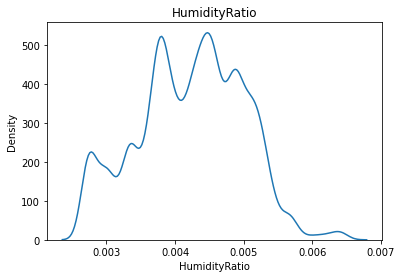

In [77]:
sns.kdeplot(df3['HumidityRatio']).set(title='HumidityRatio')

[Text(0.5, 1.0, 'Light')]

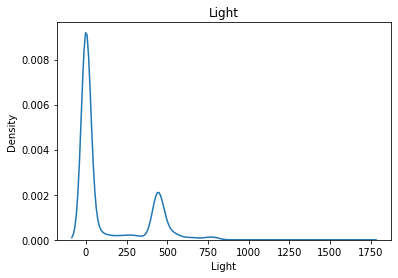

In [78]:
sns.kdeplot(df3['Light']).set(title='Light')

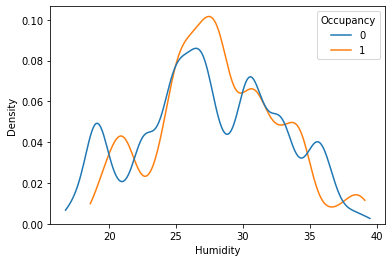

In [79]:
sns.kdeplot(data=df3, x="Humidity", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

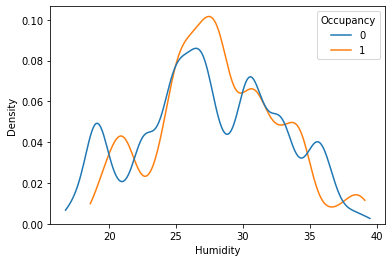

In [80]:
sns.kdeplot(data=df3, x="Humidity", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

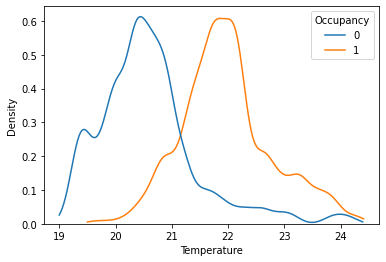

In [81]:
sns.kdeplot(data=df3, x="Temperature", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

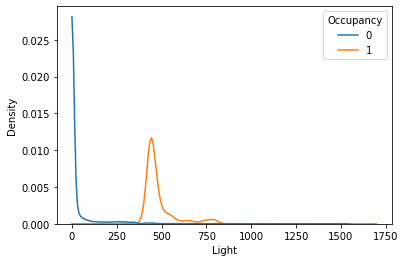

In [82]:
sns.kdeplot(data=df3, x="Light", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

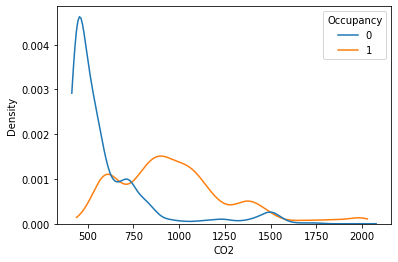

In [83]:
sns.kdeplot(data=df3, x="CO2", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

In [84]:
binary_landsat_train = df4.query("land_type==1 | land_type==3")
binary_landsat_test = df4.query("land_type==1 | land_type==3")

UndefinedVariableError: name 'land_type' is not defined

In [ ]:
X_test = np.array(df4.iloc[:,0:36])
y_test = np.array(df4.iloc[:,-1])

In [ ]:
X_train = np.array(df4.iloc[:,0:36])
y_train = np.array(df4.iloc[:,-1])

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.fit(X_test, y_test)

In [ ]:
X_test = np.array(binary_landsat_test.iloc[:,0:36])
y_test = np.array(binary_landsat_test.iloc[:,-1])

In [ ]:
cm = confusion_matrix(y_pred, y_test)
fig = plt.figure(figsize=(5,5))
heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
plt.ylabel('True label')
plt.xlabel('Predicted Label')

In [ ]:
print(classification_report(y_pred,y_test))

In [85]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

ModuleNotFoundError: No module named 'keras'

In [ ]:
fig = plt.figure(figsize=(10,7))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=train_y[i]))
    plt.axis('off')

In [89]:
df3.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [86]:
y=df3['Occupancy']

In [87]:
df3.Occupancy.groupby(df3.Occupancy).count()

Occupancy
0    15810
1     4750
Name: Occupancy, dtype: int64

In [91]:
X = np.array(df3[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])

In [92]:
clf = LogisticRegression(max_iter=1000).fit(X,y)

In [93]:
clf.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [94]:
clf.score(X,y)

0.9890077821011674

In [95]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = np.array(df3[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])

In [96]:
enc.categories_

AttributeError: 'OneHotEncoder' object has no attribute 'categories_'